In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA data manipulation and cleaning

In [12]:
# Load the data from the data folder
data_path = '../data/ratings.csv'  # Adjusted the relative path to point to the correct location
ratings_df = pd.read_csv(data_path)

# Display the first few rows of the data
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [13]:
# Load the data from the data folder
data_path = '../data/movies.csv'  # Replace 'your_file_name.csv' with the actual file name
movie_df = pd.read_csv(data_path)

# Display the first few rows of the data
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
movie_df[movie_df['title'].str.contains('Star Wars')].head()

,movieId,title,genres
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1166,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
1179,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
2537,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
5271,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX


In [17]:
data_path = '../data/tags.csv'  # Replace 'your_file_name.csv' with the actual file name
tags_df = pd.read_csv(data_path)

#tags_df.sort_values(by='movieId', ascending=True).head()

In [18]:
#tags_df[tags_df['tag'].str.contains('Disney', na=False)].head()
tags_df[(tags_df['movieId'] == 260) & (tags_df['tag'] == 'Disney')].head()

,userId,movieId,tag,timestamp


In [19]:
# join movie_df with tags_df on movieId where tags has value 'disney' or 'pixar' or 'marvel' or 'star wars'
tags_df = tags_df[tags_df['tag'].str.contains('disney|pixar|marvel|star wars', case=False, na=False)]
df = pd.merge(movie_df, tags_df, on='movieId', how='left')
# Display the first few rows of the data

# i dont care about userId, i just want unique tag for each movieId
df = df[['movieId', 'title', 'tag', 'genres']].drop_duplicates()
df = df.dropna()
df['tag'] = df['tag'].str.lower()
df['tag'] = df['tag'].str.replace(' ', '_')
df['tag'] = df['tag'].str.replace('-', '_')
df['tag'] = df['tag'].str.replace('disney', 'disney')
df['tag'] = df['tag'].str.replace('pixar', 'pixar')
df['tag'] = df['tag'].str.replace('marvel', 'marvel')
df['tag'] = df['tag'].str.replace('star_wars', 'star_wars')
df = df.drop_duplicates()
df = df.sort_values(by='movieId', ascending=True)
# get rid of the tags that are not just disney, pixar, marvel, star_wars
df = df[df['tag'].isin(['disney', 'pixar', 'marvel', 'star_wars'])]
# check the data
df.tail(50)

,movieId,title,tag,genres
78747,229519,Rebel Scum (2016),star_wars,Drama|Sci-Fi
78748,229521,Saving Star Wars (2004),star_wars,Comedy
78749,229523,Star Wars: Revelations,star_wars,(no genres listed)
78750,229525,Trooper Clerks: The Animated One-Shot (2000),star_wars,Comedy|Sci-Fi
78753,229531,Return of the Ewok (1982),star_wars,Documentary|Sci-Fi
78755,229533,R2-D2: Beneath the Dome (2001),star_wars,Comedy
78970,230385,Fanarchy (2015),star_wars,Documentary
79225,231409,From All of Us to All of You (1958),disney,Animation|Children|Comedy
79335,231963,"Olive, the Other Reindeer (1999)",disney,Animation|Children|Comedy
80349,236207,Trolley Troubles (1927),disney,Animation


In [20]:
# merge the df with ratings_df on movieId but i want to keep genre from movie_df
df = pd.merge(df, ratings_df, on='movieId', how='right')
df = df.dropna()

In [21]:
# separate the genres into multiple columns and dummy the columns
def split_genres(row):
    return row.split('|')
df['genres'] = df['genres'].apply(split_genres)
# i only care about a few genres
df['genres'] = df['genres'].apply(lambda x: [i for i in x if i in ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Musical', 'Sci-Fi']])
df = df.explode('genres')
df = pd.get_dummies(df, columns=['genres'], prefix='', prefix_sep='')

In [22]:
# get the mean rating for each movieId
df.groupby(['movieId'])['rating'].mean()
# dummy encode the tags
df = pd.get_dummies(df, columns=['tag'])

In [23]:
agg_df = df.groupby(['movieId', 'title']).agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count'),
    genre_action =('Action', 'max'),
    genre_adventure=('Adventure', 'max'),
    genre_animation=('Animation', 'max'),
    genre_children=('Children', 'max'),
    genre_comedy=('Comedy', 'max'),
    genre_fantasy=('Fantasy', 'max'),
    genre_musical=('Musical', 'max'),
    genre_scifi=('Sci-Fi', 'max'),
    tag_disney=('tag_disney', 'max'),
    tag_marvel=('tag_marvel', 'max'),
    tag_pixar=('tag_pixar', 'max'),
    tag_star_wars=('tag_star_wars', 'max')
).reset_index()

agg_df.head(30)

,movieId,title,avg_rating,num_ratings,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_fantasy,genre_musical,genre_scifi,tag_disney,tag_marvel,tag_pixar,tag_star_wars
0,1,Toy Story (1995),3.897438,689970,False,True,True,True,True,True,False,False,True,False,True,False
1,8,Tom and Huck (1995),3.115563,3020,False,True,False,True,False,False,False,False,True,False,False,False
2,14,Nixon (1995),3.428303,6116,False,False,False,False,False,False,False,False,True,False,False,False
3,18,Four Rooms (1995),3.403489,6191,False,False,False,False,True,False,False,False,True,False,False,False
4,48,Pocahontas (1995),2.990234,47001,False,False,True,True,False,False,True,False,True,False,False,False
5,54,"Big Green, The (1995)",2.815989,2114,False,False,False,True,True,False,False,False,True,False,False,False
6,70,From Dusk Till Dawn (1996),3.343260,33648,True,False,False,False,True,False,False,False,True,False,False,False
7,107,Muppet Treasure Island (1996),3.221542,27128,False,True,False,True,True,False,True,False,True,False,False,False
8,173,Judge Dredd (1995),2.567427,33666,True,False,False,False,False,False,False,True,True,False,False,False
9,188,"Prophecy, The (1995)",3.331514,2656,False,False,False,False,False,True,False,False,True,False,False,False


In [24]:
import re

agg_df['year'] = agg_df['title'].apply(lambda x: int(re.search(r'\((\d{4})\)', x).group(1)) if re.search(r'\((\d{4})\)', x) else None).astype('Int64')
agg_df['decade'] = agg_df['year'].apply(lambda x: (x // 10) * 10 if x is not None else None).astype('Int64')

agg_df.head()


,movieId,title,avg_rating,num_ratings,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_fantasy,genre_musical,genre_scifi,tag_disney,tag_marvel,tag_pixar,tag_star_wars,year,decade
0,1,Toy Story (1995),3.897438,689970,False,True,True,True,True,True,False,False,True,False,True,False,1995,1990
1,8,Tom and Huck (1995),3.115563,3020,False,True,False,True,False,False,False,False,True,False,False,False,1995,1990
2,14,Nixon (1995),3.428303,6116,False,False,False,False,False,False,False,False,True,False,False,False,1995,1990
3,18,Four Rooms (1995),3.403489,6191,False,False,False,False,True,False,False,False,True,False,False,False,1995,1990
4,48,Pocahontas (1995),2.990234,47001,False,False,True,True,False,False,True,False,True,False,False,False,1995,1990


In [25]:
#remove rows with num_ratings under 100
agg_df = agg_df[agg_df['num_ratings'] >= 100]
agg_df['is_franchise'] = agg_df[['tag_pixar', 'tag_marvel', 'tag_star_wars']].any(axis=1).astype(int)
agg_df

,movieId,title,avg_rating,num_ratings,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_fantasy,genre_musical,genre_scifi,tag_disney,tag_marvel,tag_pixar,tag_star_wars,year,decade,is_franchise
0,1,Toy Story (1995),3.897438,689970,False,True,True,True,True,True,False,False,True,False,True,False,1995,1990,1
1,8,Tom and Huck (1995),3.115563,3020,False,True,False,True,False,False,False,False,True,False,False,False,1995,1990,0
2,14,Nixon (1995),3.428303,6116,False,False,False,False,False,False,False,False,True,False,False,False,1995,1990,0
3,18,Four Rooms (1995),3.403489,6191,False,False,False,False,True,False,False,False,True,False,False,False,1995,1990,0
4,48,Pocahontas (1995),2.990234,47001,False,False,True,True,False,False,True,False,True,False,False,False,1995,1990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,282125,Ant-Man and the Wasp: Quantumania (2023),2.797405,1503,False,True,False,False,True,False,False,True,False,True,False,False,2023,2020,1
724,285593,Guardians of the Galaxy Volume 3 (2023),3.728571,2940,True,True,False,False,False,False,False,True,False,True,False,False,2023,2020,1
725,286029,The Little Mermaid (2023),2.640741,405,False,True,False,True,False,True,False,False,True,False,False,False,2023,2020,0
726,286897,Spider-Man: Across the Spider-Verse (2023),4.207414,4532,True,True,True,False,False,False,False,True,False,True,False,False,2023,2020,1


In [26]:
agg_df.sort_values(by='num_ratings', ascending=False).head(30)
# remove big titles that are not disney
agg_df = agg_df[~agg_df['movieId'].isin([286897, 195159, 3000, 778, 7925, 4306, 8360, 5218])]
agg_df

,movieId,title,avg_rating,num_ratings,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_fantasy,genre_musical,genre_scifi,tag_disney,tag_marvel,tag_pixar,tag_star_wars,year,decade,is_franchise
0,1,Toy Story (1995),3.897438,689970,False,True,True,True,True,True,False,False,True,False,True,False,1995,1990,1
1,8,Tom and Huck (1995),3.115563,3020,False,True,False,True,False,False,False,False,True,False,False,False,1995,1990,0
2,14,Nixon (1995),3.428303,6116,False,False,False,False,False,False,False,False,True,False,False,False,1995,1990,0
3,18,Four Rooms (1995),3.403489,6191,False,False,False,False,True,False,False,False,True,False,False,False,1995,1990,0
4,48,Pocahontas (1995),2.990234,47001,False,False,True,True,False,False,True,False,True,False,False,False,1995,1990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,280906,Disenchanted (2022),2.638889,216,False,False,False,True,True,True,False,False,True,False,False,False,2022,2020,0
723,282125,Ant-Man and the Wasp: Quantumania (2023),2.797405,1503,False,True,False,False,True,False,False,True,False,True,False,False,2023,2020,1
724,285593,Guardians of the Galaxy Volume 3 (2023),3.728571,2940,True,True,False,False,False,False,False,True,False,True,False,False,2023,2020,1
725,286029,The Little Mermaid (2023),2.640741,405,False,True,False,True,False,True,False,False,True,False,False,False,2023,2020,0


In [27]:
# bring the last three columns to the front after num_ratings
agg_df = agg_df[['movieId', 'title', 'year', 'decade', 'num_ratings', 'avg_rating', 'is_franchise', 'genre_action', 'genre_adventure', 'genre_animation', 
                 'genre_children', 'genre_comedy', 'genre_fantasy', 'genre_musical', 'genre_scifi', 'tag_disney', 'tag_marvel', 'tag_pixar', 'tag_star_wars']]

# make false values 0 and true values 1
agg_df = agg_df.replace({False: 0, True: 1})
agg_df.head(20)

/var/folders/7w/1n03gdkx38bd7thr31b0swt00000gn/T/ipykernel_27548/4076871288.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agg_df = agg_df.replace({False: 0, True: 1})


,movieId,title,year,decade,num_ratings,avg_rating,is_franchise,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_fantasy,genre_musical,genre_scifi,tag_disney,tag_marvel,tag_pixar,tag_star_wars
0,1,Toy Story (1995),1995,1990,689970,3.897438,1,0,1,1,1,1,1,0,0,1,0,1,0
1,8,Tom and Huck (1995),1995,1990,3020,3.115563,0,0,1,0,1,0,0,0,0,1,0,0,0
2,14,Nixon (1995),1995,1990,6116,3.428303,0,0,0,0,0,0,0,0,0,1,0,0,0
3,18,Four Rooms (1995),1995,1990,6191,3.403489,0,0,0,0,0,1,0,0,0,1,0,0,0
4,48,Pocahontas (1995),1995,1990,47001,2.990234,0,0,0,1,1,0,0,1,0,1,0,0,0
5,54,"Big Green, The (1995)",1995,1990,2114,2.815989,0,0,0,0,1,1,0,0,0,1,0,0,0
6,70,From Dusk Till Dawn (1996),1996,1990,33648,3.343260,0,1,0,0,0,1,0,0,0,1,0,0,0
7,107,Muppet Treasure Island (1996),1996,1990,27128,3.221542,0,0,1,0,1,1,0,1,0,1,0,0,0
8,173,Judge Dredd (1995),1995,1990,33666,2.567427,0,1,0,0,0,0,0,0,1,1,0,0,0
9,188,"Prophecy, The (1995)",1995,1990,2656,3.331514,0,0,0,0,0,0,1,0,0,1,0,0,0


## EDA visualizations

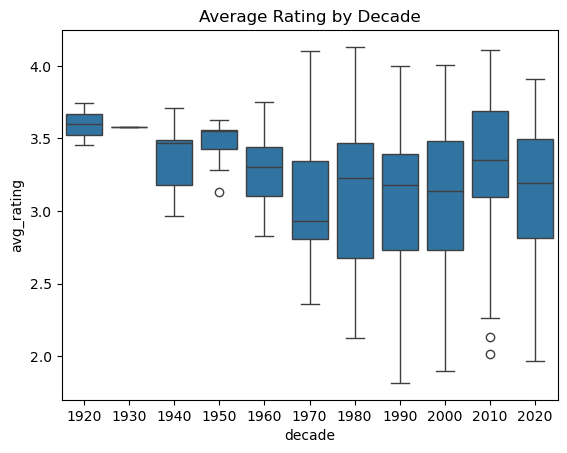

In [29]:
sns.boxplot(x='decade', y='avg_rating', data=agg_df)
plt.title('Average Rating by Decade')
plt.show()

In [31]:
import os

# Ensure the 'outputs' directory exists
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

# Save the plot
plt.savefig(os.path.join(output_dir, "average_rating_by_decade.png"))

<Figure size 640x480 with 0 Axes>

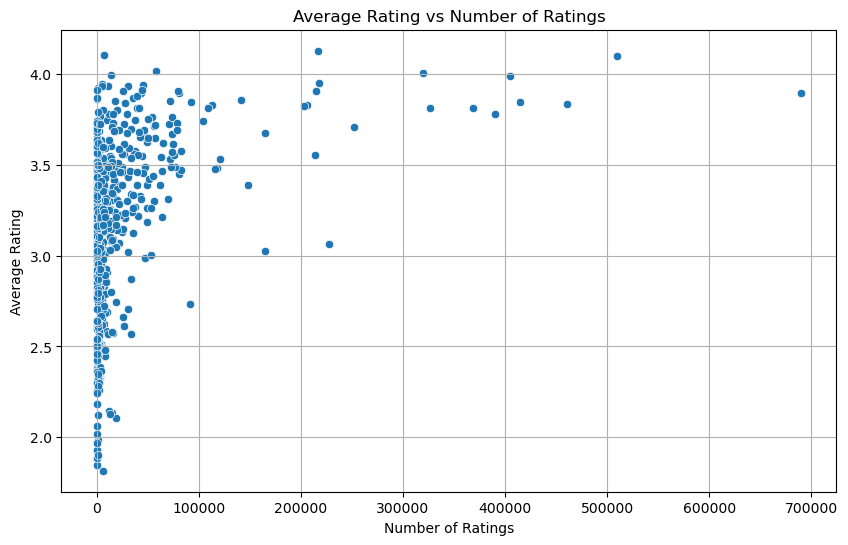

In [33]:
# scatter plot of avg_rating vs num_ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_ratings', y='avg_rating', data=agg_df)
plt.title('Average Rating vs Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

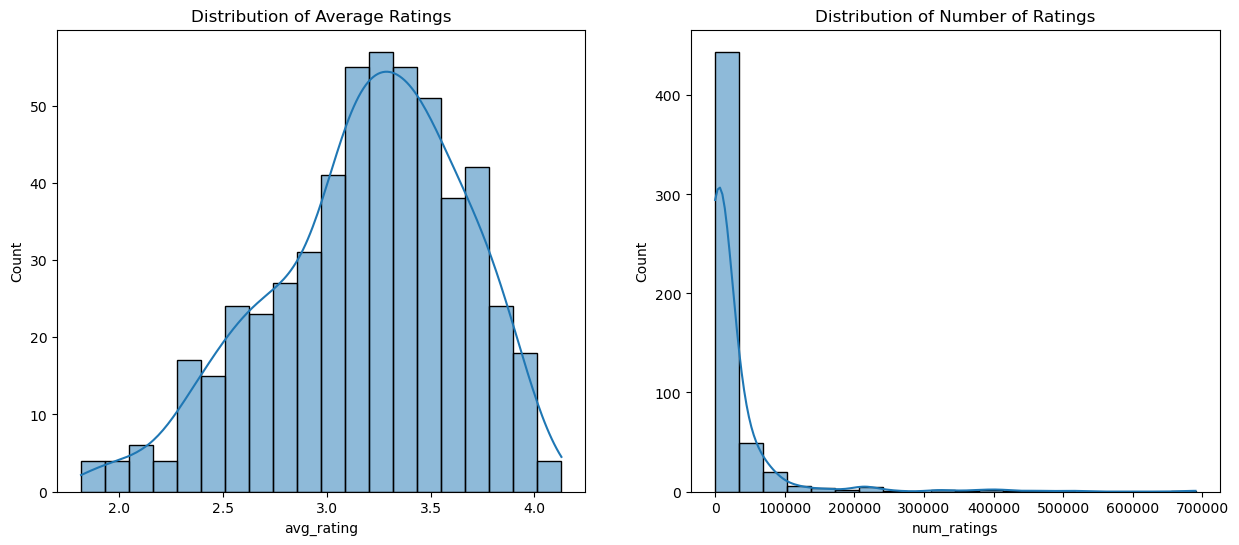

In [34]:
# make the two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(agg_df['avg_rating'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Average Ratings')
sns.histplot(agg_df['num_ratings'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Number of Ratings')
plt.show()


In [35]:
# find top 10 movies by avg_rating
top_10_movies = agg_df.sort_values(by='num_ratings', ascending=False).head(40)
top_10_movies[['title', 'num_ratings', 'avg_rating']]

,title,num_ratings,avg_rating
0,Toy Story (1995),689970,3.897438
14,Star Wars: Episode IV - A New Hope (1977),510060,4.099824
216,"Monsters, Inc. (2001)",460360,3.837442
284,"Incredibles, The (2004)",414630,3.848238
69,Star Wars: Episode VI - Return of the Jedi (1983),404976,3.991555
254,Pirates of the Caribbean: The Curse of the Bla...,389776,3.780530
249,Finding Nemo (2003),369024,3.816500
178,Toy Story 2 (1999),326830,3.812043
342,WALL·E (2008),319944,4.007614
24,Aladdin (1992),252210,3.707317


there are a lot of movies that are not disnye produced, such as shrek, iceage, princess mononoke. User-provided tags were noisy, leading to misclassifications (e.g., Shrek, Ice Age). Therefore, I manually curated a Disney/Pixar/Marvel/Star Wars movie list to ensure accuracy of analysis."

### Simple Regression to see if there is a pattern in average_rating of a movie

In [36]:
import statsmodels.api as sm

X = agg_df[['decade', 'is_franchise', 'genre_action', 'genre_adventure', 'genre_animation', 
                 'genre_children', 'genre_comedy', 'genre_fantasy', 'genre_musical', 'genre_scifi', 'tag_disney', 'tag_marvel', 'tag_pixar', 'tag_star_wars']] # add more if you want
X = pd.get_dummies(X, columns=['decade'], drop_first=True).replace({False: 0, True: 1})
# dummy code decade
y = agg_df['avg_rating']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     8.004
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.32e-22
Time:                        22:53:46   Log-Likelihood:                -267.09
No. Observations:                 540   AIC:                             582.2
Df Residuals:                     516   BIC:                             685.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.4422      0.302     

/var/folders/7w/1n03gdkx38bd7thr31b0swt00000gn/T/ipykernel_27548/3167889819.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = pd.get_dummies(X, columns=['decade'], drop_first=True).replace({False: 0, True: 1})


I initially included a wide range of predictors, including genre indicators, franchise status, and decade dummies. After reviewing the statistical significance and considering domain relevance, I pruned the model to focus on statistically meaningful variables (p<0.05) and business-relevant predictors. This improved model interpretability and overall fit while maintaining critical controls."

In [37]:
import statsmodels.api as sm

X = agg_df[['is_franchise', 'genre_adventure', 'genre_animation', 
                 'genre_children', 'genre_comedy']] # add more if you want
# dummy code decade
y = agg_df['avg_rating']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     24.44
Date:                Thu, 15 May 2025   Prob (F-statistic):           3.46e-22
Time:                        22:53:46   Log-Likelihood:                -293.83
No. Observations:                 540   AIC:                             599.7
Df Residuals:                     534   BIC:                             625.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.1930      0.038     

from here, we can see that being a franchise and being an animation movie have positive effects on the average_rating. Is_franchise increases average rating by 0.1286 and it is statistically significant with a p-value of 0.003, while genre_animation also improves the average rating by 0.3557 where it is also statistically significant. However, this makes me wonder if there is heterogenousity between is_franchise and the different genres.

### Explore interaction term (franchise vs. genre)

In [38]:
# interaction term
X['franchise_animation'] = X['is_franchise'] * X['genre_animation']
X['franchise_adventure'] = X['is_franchise'] * X['genre_adventure']
X['franchise_children'] = X['is_franchise'] * X['genre_children']
X['franchise_comedy'] = X['is_franchise'] * X['genre_comedy']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     15.81
Date:                Thu, 15 May 2025   Prob (F-statistic):           5.23e-23
Time:                        22:53:46   Log-Likelihood:                -285.26
No. Observations:                 540   AIC:                             590.5
Df Residuals:                     530   BIC:                             633.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.2846    

The positive and statistically significant coefficient of 0.2045 suggests that the interaction between franchise and comedy leads to an increase in average ratings by about 20.45%. This implies that while comedy may slightly decrease ratings in some contexts, its effect becomes positive if it's a franchise series, meaning that viewers are enjoying the series of comedy movies.

But this makes me wonder again if a movie has multiple genre tags on it, if it would impact its avg_rating. I want to isolate the different genres, therefore I am gonna create interaction term on just different genres

In [39]:
X['adventure_animation'] = X['genre_animation'] * X['genre_adventure']
X['children_animation'] = X['genre_animation'] * X['genre_children']
X['comedy_animation'] = X['genre_animation'] * X['genre_comedy']

X_ani = X[['genre_adventure', 'genre_animation','genre_children', 'genre_comedy', 'adventure_animation', 'children_animation', 'comedy_animation']]
X_ani = sm.add_constant(X_ani)
model = sm.OLS(y, X_ani).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     18.18
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.01e-21
Time:                        22:53:46   Log-Likelihood:                -291.57
No. Observations:                 540   AIC:                             599.1
Df Residuals:                     532   BIC:                             633.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.2989    

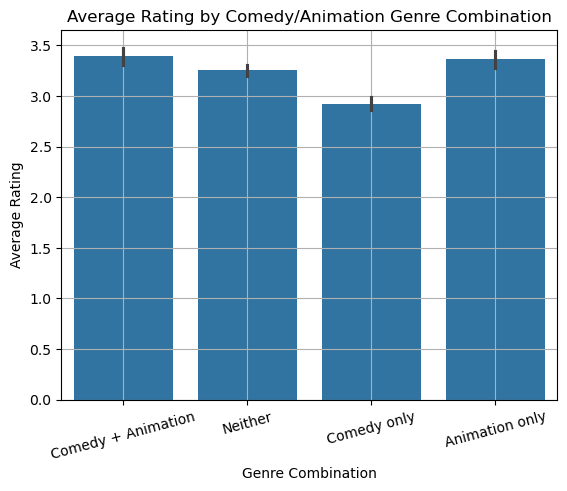

In [40]:
df_viz = agg_df.copy()
df_viz['comedy_anim_combo'] = df_viz.apply(
    lambda row: 'Comedy + Animation' if row['genre_comedy'] and row['genre_animation']
    else 'Comedy only' if row['genre_comedy']
    else 'Animation only' if row['genre_animation']
    else 'Neither',
    axis=1
)

sns.barplot(x='comedy_anim_combo', y='avg_rating', data=df_viz)
plt.title("Average Rating by Comedy/Animation Genre Combination")
plt.ylabel("Average Rating")
plt.xlabel("Genre Combination")
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

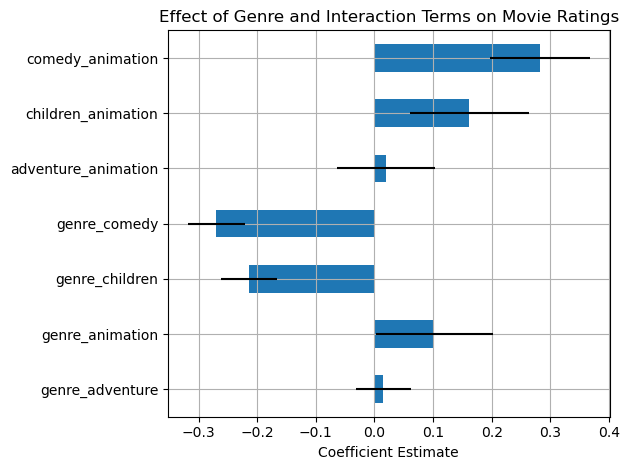

In [41]:
coef = model.params
err = model.bse

coef.drop('const').plot(kind='barh', xerr=err.drop('const'))
plt.title("Effect of Genre and Interaction Terms on Movie Ratings")
plt.xlabel("Coefficient Estimate")
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
agg_df[(agg_df['is_franchise'] == 1)&(agg_df['genre_comedy'] == 1)].head(20)
agg_df[(agg_df['is_franchise'] == 0)&(agg_df['genre_comedy'] == 1)].head(20)

,movieId,title,year,decade,num_ratings,avg_rating,is_franchise,genre_action,genre_adventure,genre_animation,genre_children,genre_comedy,genre_fantasy,genre_musical,genre_scifi,tag_disney,tag_marvel,tag_pixar,tag_star_wars
3,18,Four Rooms (1995),1995,1990,6191,3.403489,0,0,0,0,0,1,0,0,0,1,0,0,0
5,54,"Big Green, The (1995)",1995,1990,2114,2.815989,0,0,0,0,1,1,0,0,0,1,0,0,0
6,70,From Dusk Till Dawn (1996),1996,1990,33648,3.343260,0,1,0,0,0,1,0,0,0,1,0,0,0
7,107,Muppet Treasure Island (1996),1996,1990,27128,3.221542,0,0,1,0,1,1,0,1,0,1,0,0,0
10,223,Clerks (1994),1994,1990,27906,3.839855,0,0,0,0,0,1,0,0,0,1,0,0,0
11,239,"Goofy Movie, A (1995)",1995,1990,12210,3.120885,0,0,0,1,1,1,0,0,0,1,0,0,0
12,250,Heavyweights (Heavy Weights) (1995),1995,1990,2210,3.080543,0,0,0,0,1,1,0,0,0,1,0,0,0
13,258,"Kid in King Arthur's Court, A (1995)",1995,1990,7228,2.625346,0,0,1,0,1,1,1,0,0,1,0,0,0
15,274,Man of the House (1995),1995,1990,1296,2.825617,0,0,0,0,0,1,0,0,0,1,0,0,0
16,317,"Santa Clause, The (1994)",1994,1990,35806,3.123666,0,0,0,0,0,1,1,0,0,1,0,0,0


In [43]:
# find the quantiles of average rating
agg_df['avg_rating'].quantile([0.25, 0.5, 0.75]).iloc[0]

2.9033872635933804

In [44]:
import statsmodels.formula.api as smf

quantiles = [0.25, 0.75]
for q in quantiles:
	model = smf.quantreg('avg_rating ~ is_franchise + genre_animation + genre_comedy', agg_df)
	res = model.fit(q=q)
	print(f"Quantile: {q}")
	print(res.summary())

Quantile: 0.25
                         QuantReg Regression Results                          
Dep. Variable:             avg_rating   Pseudo R-squared:               0.1074
Model:                       QuantReg   Bandwidth:                      0.2266
Method:                 Least Squares   Sparsity:                        1.535
Date:                Thu, 15 May 2025   No. Observations:                  540
Time:                        22:53:47   Df Residuals:                      536
                                        Df Model:                            3
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.9063      0.044     65.842      0.000       2.820       2.993
is_franchise        0.1783      0.062      2.863      0.004       0.056       0.301
genre_animation     0.2912      0.064      4.539      0.000       0.165       0.417
genre_comedy

Quantile regression revealed that Disney franchise and animated films consistently receive higher user ratings, even at lower ends of the rating distribution—while comedies tend to be rated lower. This suggests brand and genre play a significant role in shaping viewer perception.